#   **Pattern recognition course | ECE AUTH | 2nd project | Winter semester 2022**



>   Giachoudis Christos


>   Kostopoulos Andreas Marios

# **General comments**



# Necessary imports

In [1]:
# Importing the necessary libraries and modules
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import statistics
from matplotlib import cm
from IPython import display

# Data that are given by the task

In [ ]:
# Task data

# **Part A**

# **Task A.1**

# **Task A.2**

# **Part B**

Prior probability density function for θ


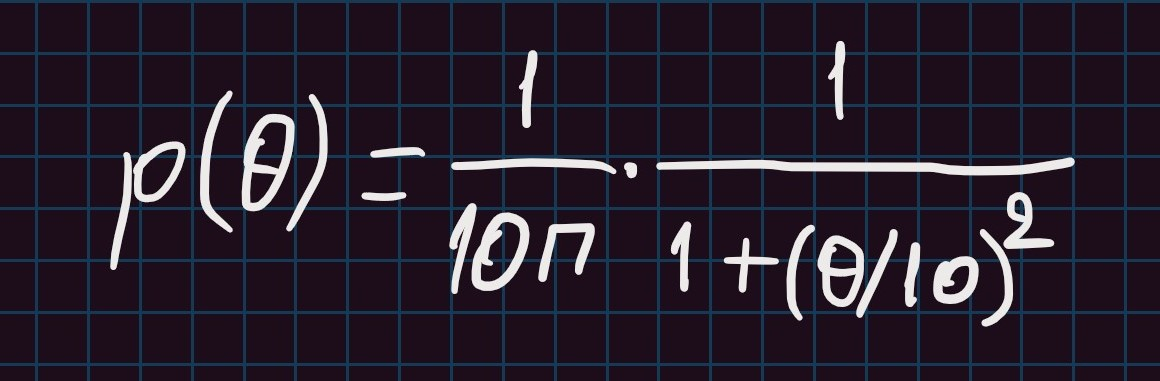

In [2]:
print("Prior probability density function for θ")
display.Image("Part_B.jpg")

___The θ values:___
[-60.   -59.99 -59.98 ...  59.97  59.98  59.99]

___The pdf values:___
[0.0008603  0.00086058 0.00086086 ... 0.00086113 0.00086086 0.00086058]

___The plot of the pdf:___


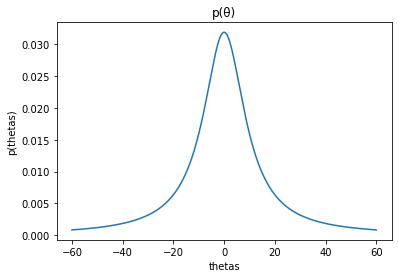

In [3]:
# Prior probability density function for θ
begin = -60
end = 60
step = 0.01
theta = np.arange(begin, end, step)
p_theta = (1/(10*math.pi)) * (1/(1 + (theta/10)**2))

# Print θ and pdf values to be sure
print("___The θ values:___")
print(theta)
print("")
print("___The pdf values:___")
print(p_theta)
print("")

# Plot the pdf
print("___The plot of the pdf:___")
plt.title("p(θ)") 
plt.xlabel("thetas") 
plt.ylabel("p(thetas)") 
plt.plot(theta, p_theta) 
plt.show()

# **Task B.1**

> Computation of p(θ|D1) and p(θ|D2)

Prior probability density function for θ


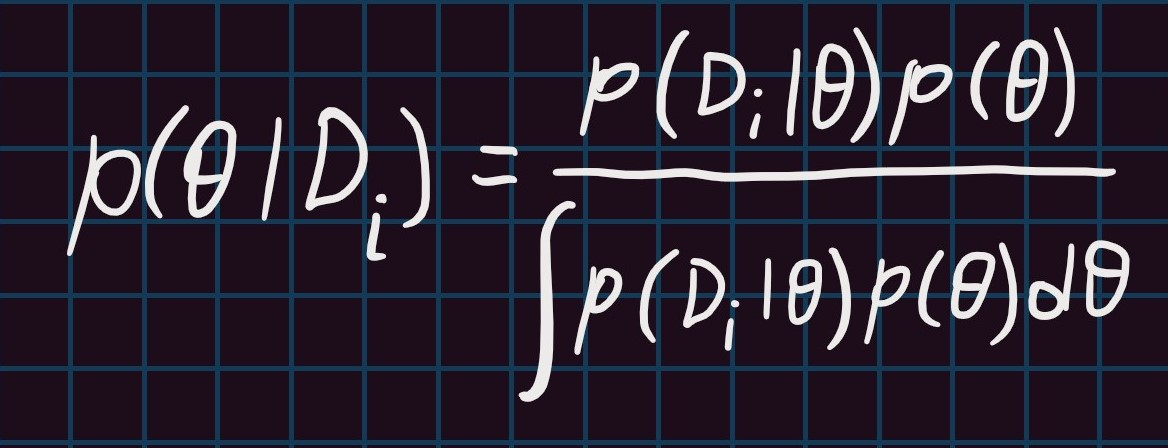

In [4]:
print("Prior probability density function for θ")
display.Image("p_theta_D.jpg")

In [ ]:
# p(D_i|θ) exists because of task A.1
# p(θ) has been computed at the beginning of task B

# Multiplication computation for both the denominator and the numerator
p_D1_theta = np.ones(p_theta.size)
p_D2_theta = np.ones(p_theta.size)
numerator1 = np.multiply(p_D1_theta, p_theta)
numerator2 = np.multiply(p_D2_theta, p_theta)

# Integral computation (Approximation using sum)
denominator1 = 0
denominator2 = 0
for i in range(numerator1.size):
    denominator1 += numerator1 * step
for i in range(numerator2.size):
    denominator2 += numerator2 * step

# p(θ|D_i) computation
p_theta_D1 = numerator1/denominator1
p_theta_D2 = numerator2/denominator2

# Plot the computed pdfs
# first one
fig = plt.figure(figsize=(35, 10))
ax = fig.add_subplot(1, 3, 1)
plt.title("pdf i")
plt.xlabel("thetas")
plt.ylabel("pdf i values")
#plotting
plt.legend(loc = "lower right")

# second one
ax = fig.add_subplot(1, 3, 2)
plt.title("pdf i")
plt.xlabel("thetas")
plt.ylabel("pdf i values")
#plotting
plt.legend(loc = "lower right")

# Plot p(θ) and p(θ|D_i) to compare
ax = fig.add_subplot(1, 3, 3)
plt.title("pdf i")
plt.xlabel("thetas")
plt.ylabel("pdf i values")
#plotting
plt.legend(loc = "lower right")

# Show all plots
plt.show()

# **Task B.2**